In [237]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor



In [238]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['tmp'] = data.target
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,tmp
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [239]:
data.data = preprocessing.scale(data.data)
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.25, random_state=42)
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()


In [240]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [241]:

ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Оценка модели
y_pred = ols_reg.predict(X_test)

# Оценка точности модели
score = ols_reg.score(X_test, y_test)
print(score)

0.4839561798965698


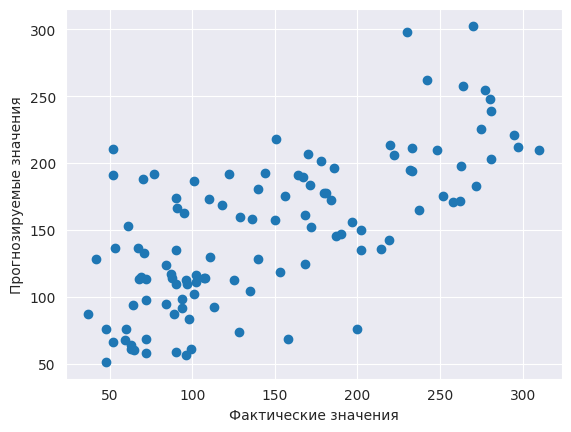

In [242]:
plt.scatter(y_test, y_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Прогнозируемые значения")
plt.show()

In [243]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, params, cv=5)
grid.fit(X_train, y_train)
knn_reg = KNeighborsRegressor(n_neighbors=grid.best_params_['n_neighbors'], weights='distance', p=5)
knn_reg.fit(X_train, y_train)

# Оценка модели
y_pred = knn_reg.predict(X_test)

# Оценка точности модели
score = knn_reg.score(X_test, y_test)
print(score)

0.48697880729625775


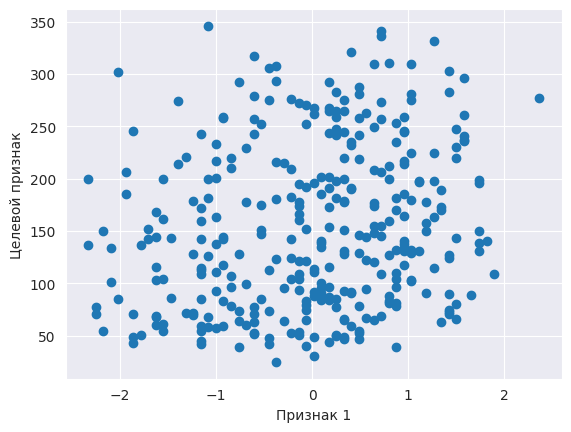

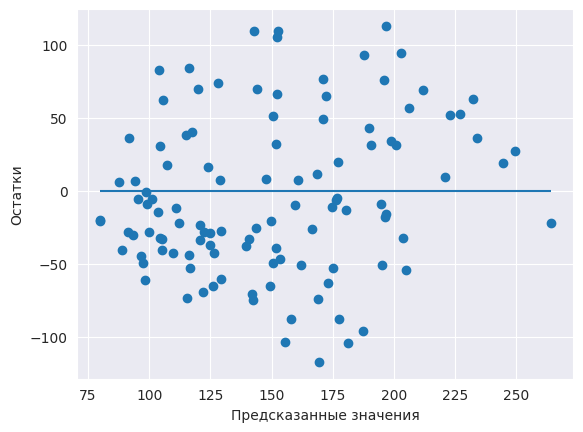

In [244]:
plt.scatter(X_train[:, 0], y_train)
plt.xlabel('Признак 1')
plt.ylabel('Целевой признак')
plt.show()

# График остатков
pred = knn_reg.predict(X_test)
resid = y_test - pred
plt.scatter(pred, resid)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.hlines(y=0, xmin=pred.min(), xmax=pred.max())
plt.show()



In [245]:
params = {'alpha': np.arange(0.1, 10, 0.1)}
ridge = Ridge()
grid = GridSearchCV(ridge, params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
ridge_reg = Ridge(alpha=grid.best_params_['alpha'])
ridge_reg.fit(X_train, y_train)

# Оценка модели
y_pred = ridge_reg.predict(X_test)

# Оценка точности модели
score = ridge_reg.score(X_test, y_test)
print(score)

{'alpha': 9.9}
0.4875982648164676


Text(0, 0.5, 'Ошибка')

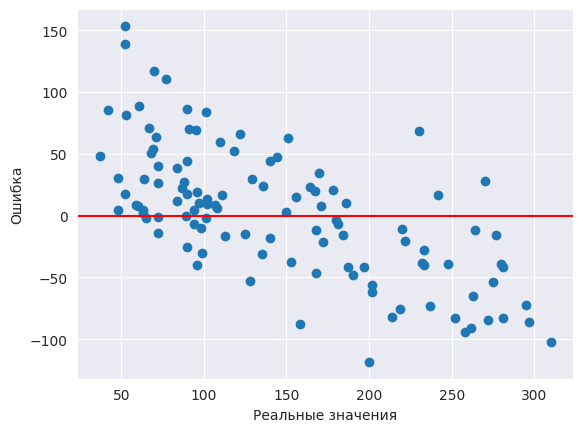

In [246]:
plt.scatter(y_test, y_pred - y_test)
plt.axhline(y=0, color='r')
plt.xlabel('Реальные значения')
plt.ylabel('Ошибка')

In [247]:
params = {'alpha': np.arange(0.1, 12, 0.1)}
lasso = Lasso()
grid = GridSearchCV(lasso, params, cv=5)
grid.fit(X_train, y_train)
lasso_reg = Lasso(alpha=grid.best_params_['alpha'])
lasso_reg.fit(X_train, y_train)

# Оценка модели
y_pred = lasso_reg.predict(X_test)

# Оценка точности модели
score = lasso_reg.score(X_test, y_test)
print(score)

0.484737498643976


Text(0, 0.5, 'Ошибка')

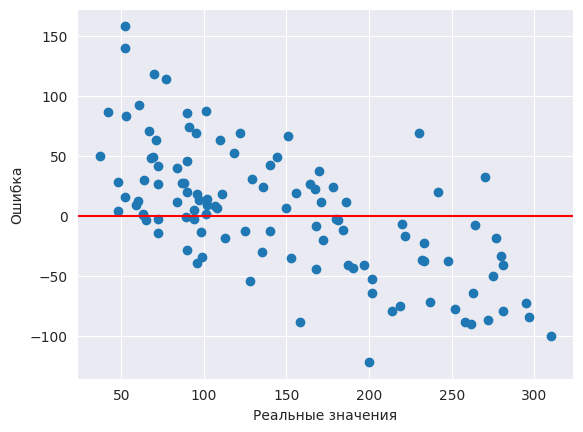

In [248]:
plt.scatter(y_test, y_pred - y_test)
plt.axhline(y=0, color='r')
plt.xlabel('Реальные значения')
plt.ylabel('Ошибка')

In [249]:
from sklearn.datasets import make_classification


In [250]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

LR_clf = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(LR_clf.score(X_train, y_train)))

Accuracy of Logistic regression classifier on training set: 0.44


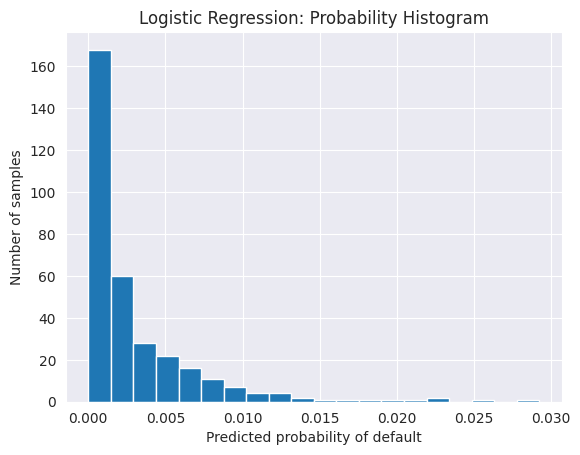

In [251]:
y_pred_prob = LR_clf.predict_proba(X_train)[:,1]

# Построение гистограммы
plt.hist(y_pred_prob, bins=20)
plt.xlabel('Predicted probability of default')
plt.ylabel('Number of samples')
plt.title('Logistic Regression: Probability Histogram')
plt.show()